# 데이터 선정 이유 및 문제 정의

프로젝트 데이터 선정 중에 uci repository에서 한국과 관련된 데이터를 찾았고, 흥미가 생겨 데이터를 선정했다. target도 명확했고, 날짜가 있어서    
필요에 따라 데이터를 합치기 쉬울 것 같아서 선정했다.

데이터는 서울 공공자전거의 시간당 대여 수의 데이터이다. 다양한 환경 요인이 공공자전거 수요에 어떠한 영향을 미치는지 알아보고 나아가 환경에 따른 수요 예측을 한다.



# 데이터를 이용한 가설 및 평가지표, 베이스라인 설정

공공자전거는 출퇴근, 운동, 그외 여러가지 이유로 대여한다. 이러한 공공자전거 수요에 환경적인 요인이 영향을 미칠 것이라는 가설을 세웠다.    
베이스라인은 총 1년간 시간당 대여 자전거 수의 평균으로 설정한다.   
자전거 대여 수가 연속적인 데이터이기 때문에 회귀문제로 설정함. 평가지표는 mae pvalue r2등 다양하게 사용한다.

# 데이터 전처리

원본 데이터에 대기오염수치 데이터를 합쳐 준 뒤 데이터 탐색을 하고, 후에 머신러닝을 하기위한 프로세싱을 한다.

In [11]:
import pandas as pd


# 데이터 세트 정보:
# 데이터 세트에는 날씨 정보(온도, 습도, 풍속, 가시성, 이슬점, 일사량, 강설량, 강우량), 시간당 대여한 자전거 수 및 날짜 정보가 포함됩니다.

# 속성 정보:

# 날짜 : 년-월-일
# 대여 자전거 대수 - 시간당 대여 자전거 수
# 시간 - 시간
# 온도-온도 섭씨
# 습도 - %
# 풍속 - m/s
# 가시성 - 10m
# 이슬점 온도 - 섭씨
# 일사량 - MJ/ m2
# 강우량 - mm
# 강설량 - cm
# 계절 - 겨울, 봄, 여름, 가을
# 휴가 - 공휴일/무휴
# 기능일 - NoFunc(비기능 시간), Fun(기능 시간)

# Date : year-month-day
# Rented Bike count - Count of bikes rented at each hour
# Hour - Hour of he day
# Temperature-Temperature in Celsius
# Humidity - %
# Windspeed - m/s
# Visibility - 10m
# Dew point temperature - Celsius
# Solar radiation - MJ/m2
# Rainfall - mm
# Snowfall - cm
# Seasons - Winter, Spring, Summer, Autumn
# Holiday - Holiday/No holiday
# Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv',encoding='CP949')

df.columns = ['Date','Rented Bike count','Hour','Temperature','Humidity','Windspeed','Visibility','Dew point temperature','Solar radiation','Rainfall','Snowfall','Seasons','Holiday','Functional Day']
df.head()


,Date,Rented Bike count,Hour,Temperature,Humidity,Windspeed,Visibility,Dew point temperature,Solar radiation,Rainfall,Snowfall,Seasons,Holiday,Functional Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [14]:
dust_2017 = pd.read_excel('2017년 12월.xlsx')
dust_2017.head()

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 중구,도시대기,111121,중구,2017120101,0.004,0.4,0.028,0.016,22.0,14.0,서울 중구 덕수궁길 15
1,서울 중구,도시대기,111121,중구,2017120102,0.004,0.4,0.027,0.015,18.0,11.0,서울 중구 덕수궁길 15
2,서울 중구,도시대기,111121,중구,2017120103,0.004,0.4,0.030,0.011,18.0,13.0,서울 중구 덕수궁길 15
3,서울 중구,도시대기,111121,중구,2017120104,0.004,0.4,0.033,0.008,18.0,11.0,서울 중구 덕수궁길 15
4,서울 중구,도시대기,111121,중구,2017120105,0.004,0.4,0.033,0.008,18.0,9.0,서울 중구 덕수궁길 15


In [16]:
dust_2018_1 = pd.read_excel('2018년 1분기.xlsx')
dust_2018_1.head()

,지역,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 중구,111121,중구,2018010101,0.004,0.5,0.020,0.020,34.0,19.0,서울 중구 덕수궁길 15
1,서울 중구,111121,중구,2018010102,0.004,0.4,0.024,0.016,27.0,14.0,서울 중구 덕수궁길 15
2,서울 중구,111121,중구,2018010103,0.004,0.4,0.018,0.022,26.0,14.0,서울 중구 덕수궁길 15
3,서울 중구,111121,중구,2018010104,0.004,0.5,0.010,0.030,26.0,15.0,서울 중구 덕수궁길 15
4,서울 중구,111121,중구,2018010105,0.004,0.6,0.011,0.029,28.0,16.0,서울 중구 덕수궁길 15


In [17]:
dust_2018_2 = pd.read_excel('2018년 2분기.xlsx')

In [18]:
dust_2018_3 = pd.read_excel('2018년 3분기.xlsx')

In [19]:
dust_2018_4 = pd.read_excel('2018년 4분기.xlsx')

In [22]:
dust_2018_1.to_csv('2018_1.csv',header=False,index=False)

In [23]:
dust_2018_2.to_csv('2018_2.csv',header=False,index=False)

In [24]:
dust_2018_3.to_csv('2018_3.csv',header=False,index=False)

In [26]:
dust_2018_4.to_csv('2018_4.csv',header=False,index=False)

In [36]:
dust_2017_seoul = dust_2017[dust_2017['지역'].str.contains('서울')]
dust_2017_seoul.shape, dust_2017.shape
dust_2017_seoul

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 중구,도시대기,111121,중구,2017120101,0.004,0.4,0.028,0.016,22.0,14.0,서울 중구 덕수궁길 15
1,서울 중구,도시대기,111121,중구,2017120102,0.004,0.4,0.027,0.015,18.0,11.0,서울 중구 덕수궁길 15
2,서울 중구,도시대기,111121,중구,2017120103,0.004,0.4,0.030,0.011,18.0,13.0,서울 중구 덕수궁길 15
3,서울 중구,도시대기,111121,중구,2017120104,0.004,0.4,0.033,0.008,18.0,11.0,서울 중구 덕수궁길 15
4,서울 중구,도시대기,111121,중구,2017120105,0.004,0.4,0.033,0.008,18.0,9.0,서울 중구 덕수궁길 15
...,...,...,...,...,...,...,...,...,...,...,...,...
29011,서울 노원구,도로변대기,111312,화랑로,2017123120,0.004,0.5,0.014,0.030,27.0,NaN,서울 노원구 화랑로 429
29012,서울 노원구,도로변대기,111312,화랑로,2017123121,0.004,0.5,0.015,0.029,26.0,NaN,서울 노원구 화랑로 429
29013,서울 노원구,도로변대기,111312,화랑로,2017123122,0.005,0.5,0.014,0.027,35.0,NaN,서울 노원구 화랑로 429
29014,서울 노원구,도로변대기,111312,화랑로,2017123123,0.005,0.4,0.017,0.024,36.0,NaN,서울 노원구 화랑로 429


In [37]:
dust_2018 = pd.concat([dust_2018_1,dust_2018_2,dust_2018_3,dust_2018_4])
dust_2018

,지역,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소,망
0,서울 중구,111121,중구,2018010101,0.0040,0.5,0.020,0.0200,34.0,19.0,서울 중구 덕수궁길 15,NaN
1,서울 중구,111121,중구,2018010102,0.0040,0.4,0.024,0.0160,27.0,14.0,서울 중구 덕수궁길 15,NaN
2,서울 중구,111121,중구,2018010103,0.0040,0.4,0.018,0.0220,26.0,14.0,서울 중구 덕수궁길 15,NaN
3,서울 중구,111121,중구,2018010104,0.0040,0.5,0.010,0.0300,26.0,15.0,서울 중구 덕수궁길 15,NaN
4,서울 중구,111121,중구,2018010105,0.0040,0.6,0.011,0.0290,28.0,16.0,서울 중구 덕수궁길 15,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
893144,인천 옹진군,831492,백령도,2018123120,0.0011,0.4,0.037,0.0025,16.0,7.0,인천 옹진군 백령면 연화리,국가배경농도
893145,인천 옹진군,831492,백령도,2018123121,0.0011,0.4,0.037,0.0024,6.0,NaN,인천 옹진군 백령면 연화리,국가배경농도
893146,인천 옹진군,831492,백령도,2018123122,0.0011,0.4,0.036,0.0024,19.0,9.0,인천 옹진군 백령면 연화리,국가배경농도
893147,인천 옹진군,831492,백령도,2018123123,0.0012,0.4,0.035,0.0026,15.0,8.0,인천 옹진군 백령면 연화리,국가배경농도


In [38]:
dust_2018_seoul = dust_2018[dust_2018['지역'].str.contains('서울')]
dust_2018_seoul.shape, dust_2018.shape

((343104, 12), (3315004, 12))

In [39]:
dust_2018_seoul

,지역,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소,망
0,서울 중구,111121,중구,2018010101,0.004,0.5,0.020,0.020,34.0,19.0,서울 중구 덕수궁길 15,NaN
1,서울 중구,111121,중구,2018010102,0.004,0.4,0.024,0.016,27.0,14.0,서울 중구 덕수궁길 15,NaN
2,서울 중구,111121,중구,2018010103,0.004,0.4,0.018,0.022,26.0,14.0,서울 중구 덕수궁길 15,NaN
3,서울 중구,111121,중구,2018010104,0.004,0.5,0.010,0.030,26.0,15.0,서울 중구 덕수궁길 15,NaN
4,서울 중구,111121,중구,2018010105,0.004,0.6,0.011,0.029,28.0,16.0,서울 중구 덕수궁길 15,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
87571,서울 노원구,111312,화랑로,2018123120,0.004,0.5,0.005,0.036,35.0,22.0,서울 노원구 화랑로 429,도로변대기
87572,서울 노원구,111312,화랑로,2018123121,0.005,0.9,0.004,0.041,40.0,22.0,서울 노원구 화랑로 429,도로변대기
87573,서울 노원구,111312,화랑로,2018123122,0.005,1.1,0.004,0.044,45.0,23.0,서울 노원구 화랑로 429,도로변대기
87574,서울 노원구,111312,화랑로,2018123123,0.005,1.0,0.004,0.040,51.0,23.0,서울 노원구 화랑로 429,도로변대기


In [41]:
dust = pd.concat([dust_2017_seoul,dust_2018_seoul])
dust

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 중구,도시대기,111121,중구,2017120101,0.004,0.4,0.028,0.016,22.0,14.0,서울 중구 덕수궁길 15
1,서울 중구,도시대기,111121,중구,2017120102,0.004,0.4,0.027,0.015,18.0,11.0,서울 중구 덕수궁길 15
2,서울 중구,도시대기,111121,중구,2017120103,0.004,0.4,0.030,0.011,18.0,13.0,서울 중구 덕수궁길 15
3,서울 중구,도시대기,111121,중구,2017120104,0.004,0.4,0.033,0.008,18.0,11.0,서울 중구 덕수궁길 15
4,서울 중구,도시대기,111121,중구,2017120105,0.004,0.4,0.033,0.008,18.0,9.0,서울 중구 덕수궁길 15
...,...,...,...,...,...,...,...,...,...,...,...,...
87571,서울 노원구,도로변대기,111312,화랑로,2018123120,0.004,0.5,0.005,0.036,35.0,22.0,서울 노원구 화랑로 429
87572,서울 노원구,도로변대기,111312,화랑로,2018123121,0.005,0.9,0.004,0.041,40.0,22.0,서울 노원구 화랑로 429
87573,서울 노원구,도로변대기,111312,화랑로,2018123122,0.005,1.1,0.004,0.044,45.0,23.0,서울 노원구 화랑로 429
87574,서울 노원구,도로변대기,111312,화랑로,2018123123,0.005,1.0,0.004,0.040,51.0,23.0,서울 노원구 화랑로 429


In [48]:
dust = dust.groupby('측정일시').mean().reset_index().copy()
dust.iloc[:365*24]

,측정일시,측정소코드,SO2,CO,O3,NO2,PM10,PM25
0,2017120101,111207.923077,0.004658,0.402564,0.022667,0.019872,21.684211,11.000000
1,2017120102,111207.923077,0.004500,0.407692,0.022436,0.018385,21.435897,10.680000
2,2017120103,111207.923077,0.004500,0.412821,0.022641,0.017179,21.179487,10.760000
3,2017120104,111207.923077,0.004474,0.400000,0.022308,0.017154,20.410256,10.160000
4,2017120105,111207.923077,0.004579,0.389744,0.021718,0.018282,19.589744,9.600000
...,...,...,...,...,...,...,...,...
8755,2018113020,111209.775000,0.005075,0.565000,0.005150,0.049000,41.897436,18.384615
8756,2018113021,111209.775000,0.004825,0.572500,0.005225,0.047000,35.825000,17.435897
8757,2018113022,111209.775000,0.004825,0.640000,0.004500,0.048250,36.775000,17.763158
8758,2018113023,111209.775000,0.004850,0.722500,0.003100,0.051800,39.500000,19.025641


In [49]:
df

,Date,Rented Bike count,Hour,Temperature,Humidity,Windspeed,Visibility,Dew point temperature,Solar radiation,Rainfall,Snowfall,Seasons,Holiday,Functional Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [55]:
dust['측정일시'] = dust['측정일시'].astype(str)
dust.info()
dust['Hour'] = dust['측정일시'].str[-2:]
dust['측정일시'] = dust['측정일시'].str[:-2].copy()
dust.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9504 entries, 0 to 9503
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   측정일시    9504 non-null   object 
 1   측정소코드   9504 non-null   float64
 2   SO2     9504 non-null   float64
 3   CO      9504 non-null   float64
 4   O3      9504 non-null   float64
 5   NO2     9504 non-null   float64
 6   PM10    9504 non-null   float64
 7   PM25    9504 non-null   float64
 8   Hour    9504 non-null   object 
dtypes: float64(7), object(2)
memory usage: 668.4+ KB


,측정일시,측정소코드,SO2,CO,O3,NO2,PM10,PM25,Hour
0,20171201,111207.923077,0.004658,0.402564,0.022667,0.019872,21.684211,11.00,01
1,20171201,111207.923077,0.004500,0.407692,0.022436,0.018385,21.435897,10.68,02
2,20171201,111207.923077,0.004500,0.412821,0.022641,0.017179,21.179487,10.76,03
3,20171201,111207.923077,0.004474,0.400000,0.022308,0.017154,20.410256,10.16,04
4,20171201,111207.923077,0.004579,0.389744,0.021718,0.018282,19.589744,9.60,05


In [58]:
dust.drop('측정소코드',axis = 1,inplace=True)

KeyError: "['측정소코드'] not found in axis"

In [59]:
dust

,측정일시,SO2,CO,O3,NO2,PM10,PM25,Hour
0,20171201,0.004658,0.402564,0.022667,0.019872,21.684211,11.000000,01
1,20171201,0.004500,0.407692,0.022436,0.018385,21.435897,10.680000,02
2,20171201,0.004500,0.412821,0.022641,0.017179,21.179487,10.760000,03
3,20171201,0.004474,0.400000,0.022308,0.017154,20.410256,10.160000,04
4,20171201,0.004579,0.389744,0.021718,0.018282,19.589744,9.600000,05
...,...,...,...,...,...,...,...,...
9499,20181231,0.004725,0.672500,0.005775,0.047925,36.400000,21.075000,20
9500,20181231,0.004850,0.730000,0.004725,0.050350,39.125000,22.775000,21
9501,20181231,0.004900,0.790000,0.004225,0.051025,39.948718,24.125000,22
9502,20181231,0.005025,0.867500,0.003175,0.053800,41.925000,25.487179,23


In [60]:
dust.columns = ['Date','SO2','CO','O3','NO2','PM10','PM25','Hour']
dust

,Date,SO2,CO,O3,NO2,PM10,PM25,Hour
0,20171201,0.004658,0.402564,0.022667,0.019872,21.684211,11.000000,01
1,20171201,0.004500,0.407692,0.022436,0.018385,21.435897,10.680000,02
2,20171201,0.004500,0.412821,0.022641,0.017179,21.179487,10.760000,03
3,20171201,0.004474,0.400000,0.022308,0.017154,20.410256,10.160000,04
4,20171201,0.004579,0.389744,0.021718,0.018282,19.589744,9.600000,05
...,...,...,...,...,...,...,...,...
9499,20181231,0.004725,0.672500,0.005775,0.047925,36.400000,21.075000,20
9500,20181231,0.004850,0.730000,0.004725,0.050350,39.125000,22.775000,21
9501,20181231,0.004900,0.790000,0.004225,0.051025,39.948718,24.125000,22
9502,20181231,0.005025,0.867500,0.003175,0.053800,41.925000,25.487179,23


In [61]:
df['Date'] = pd.to_datetime(df['Date'])
dust['Date'] = pd.to_datetime(dust['Date'])

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8760 non-null   datetime64[ns]
 1   Rented Bike count      8760 non-null   int64         
 2   Hour                   8760 non-null   int64         
 3   Temperature            8760 non-null   float64       
 4   Humidity               8760 non-null   int64         
 5   Windspeed              8760 non-null   float64       
 6   Visibility             8760 non-null   int64         
 7   Dew point temperature  8760 non-null   float64       
 8   Solar radiation        8760 non-null   float64       
 9   Rainfall               8760 non-null   float64       
 10  Snowfall               8760 non-null   float64       
 11  Seasons                8760 non-null   object        
 12  Holiday                8760 non-null   object        
 13  Fun

In [64]:
dust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9504 entries, 0 to 9503
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9504 non-null   datetime64[ns]
 1   SO2     9504 non-null   float64       
 2   CO      9504 non-null   float64       
 3   O3      9504 non-null   float64       
 4   NO2     9504 non-null   float64       
 5   PM10    9504 non-null   float64       
 6   PM25    9504 non-null   float64       
 7   Hour    9504 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 594.1+ KB


In [67]:
dust['Hour'] = dust['Hour'].astype(int).copy()
dust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9504 entries, 0 to 9503
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9504 non-null   datetime64[ns]
 1   SO2     9504 non-null   float64       
 2   CO      9504 non-null   float64       
 3   O3      9504 non-null   float64       
 4   NO2     9504 non-null   float64       
 5   PM10    9504 non-null   float64       
 6   PM25    9504 non-null   float64       
 7   Hour    9504 non-null   int32         
dtypes: datetime64[ns](1), float64(6), int32(1)
memory usage: 557.0 KB


In [68]:
df_merge = pd.merge(df,dust,how='left')
df_merge

,Date,Rented Bike count,Hour,Temperature,Humidity,Windspeed,Visibility,Dew point temperature,Solar radiation,Rainfall,Snowfall,Seasons,Holiday,Functional Day,SO2,CO,O3,NO2,PM10,PM25
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,0.005225,0.5675,0.004725,0.052825,48.775000,21.410256
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,0.005075,0.5650,0.005150,0.049000,41.897436,18.384615
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,0.004825,0.5725,0.005225,0.047000,35.825000,17.435897
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,0.004825,0.6400,0.004500,0.048250,36.775000,17.763158


In [70]:
df_merge.isna().sum()

Date                       0
Rented Bike count          0
Hour                       0
Temperature                0
Humidity                   0
Windspeed                  0
Visibility                 0
Dew point temperature      0
Solar radiation            0
Rainfall                   0
Snowfall                   0
Seasons                    0
Holiday                    0
Functional Day             0
SO2                      618
CO                       618
O3                       618
NO2                      618
PM10                     618
PM25                     618
dtype: int64

In [71]:
df_merge = df_merge.dropna()
df_merge.isna().sum()

Date                     0
Rented Bike count        0
Hour                     0
Temperature              0
Humidity                 0
Windspeed                0
Visibility               0
Dew point temperature    0
Solar radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functional Day           0
SO2                      0
CO                       0
O3                       0
NO2                      0
PM10                     0
PM25                     0
dtype: int64

In [72]:
df_merge.to_csv('rented bike df.csv')

In [14]:
df = pd.read_csv('rented bike.csv')
df.head()

,Date,Rented Bike count,Hour,Temperature,Humidity,Windspeed,Visibility,Dew point temperature,Solar radiation,Rainfall,Snowfall,Seasons,Holiday,Functional Day,SO2,CO,O3,NO2,PM10,PM25
0,2017-12-12,127,1,-11.2,51,1.1,2000,-19.3,0.0,0.0,0.0,Winter,No Holiday,Yes,0.004167,0.432432,0.014486,0.015486,31.222222,17.04
1,2017-12-12,95,2,-11.5,50,0.7,2000,-19.8,0.0,0.0,0.0,Winter,No Holiday,Yes,0.004333,0.424324,0.014973,0.013865,32.000000,16.60
2,2017-12-12,54,3,-11.6,50,2.2,1995,-19.9,0.0,0.0,0.0,Winter,No Holiday,Yes,0.004361,0.413514,0.015324,0.013000,32.000000,16.92
3,2017-12-12,46,4,-11.6,47,2.1,1982,-20.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0.004722,0.389189,0.016703,0.011432,33.108108,15.52
4,2017-12-12,65,5,-11.6,45,2.8,1951,-21.1,0.0,0.0,0.0,Winter,No Holiday,Yes,0.005056,0.408108,0.015514,0.013432,35.594595,17.64


## 먼저 데이터는 날짜별 시간별 자전거의 대여수와 환경의 측정치 그리고 계절과 기타 특이점으로 이루어짐.
각 데이터별로 뜯어보고 시각화 해서 데이터의 특징을 설명함.

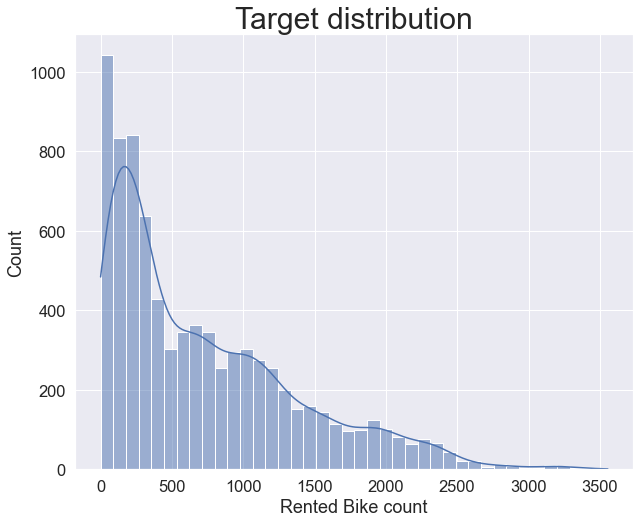

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.set(font_scale=1.5)
sns.histplot(df['Rented Bike count'],kde=True,);
plt.title('Target distribution',fontsize=30);

## 타겟과 특성들의 관계를 시각화 함

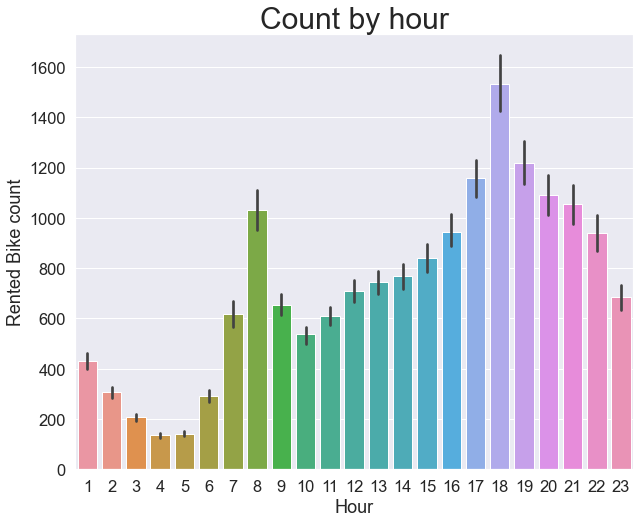

In [24]:
target = 'Rented Bike count'
plt.figure(figsize=(10,8))
sns.set(font_scale=1.5)
sns.barplot(data=df, x='Hour',y=target);
plt.title('Count by hour',fontsize=30);

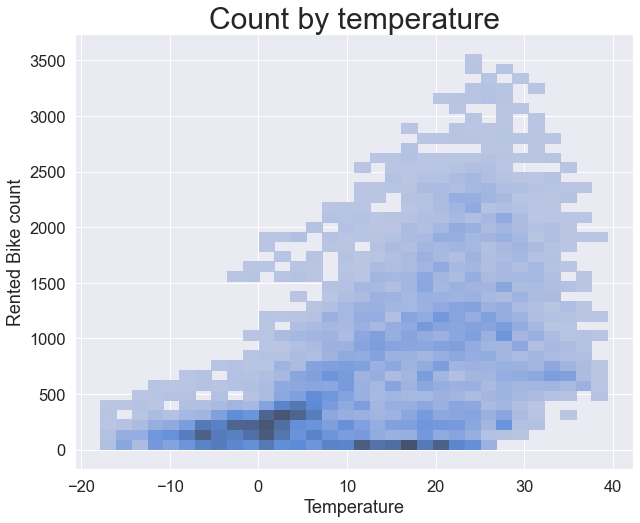

In [41]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.5)
sns.histplot(data=df, x='Temperature',y=target);
plt.title('Count by temperature',fontsize=30);

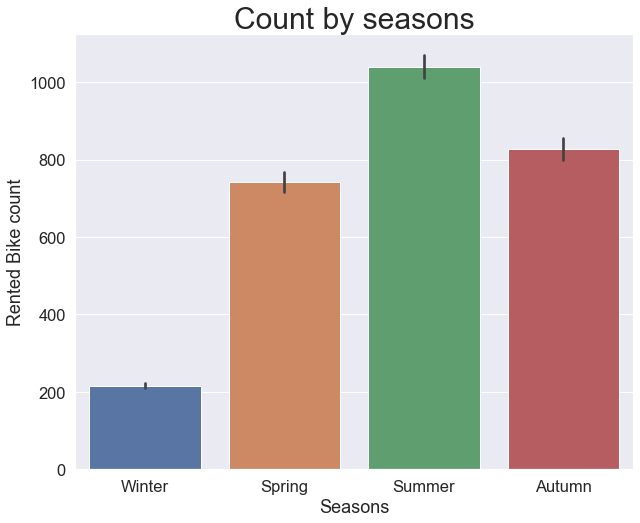

In [38]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.5)
sns.barplot(data=df, x='Seasons',y=target);
plt.title('Count by seasons',fontsize=30);

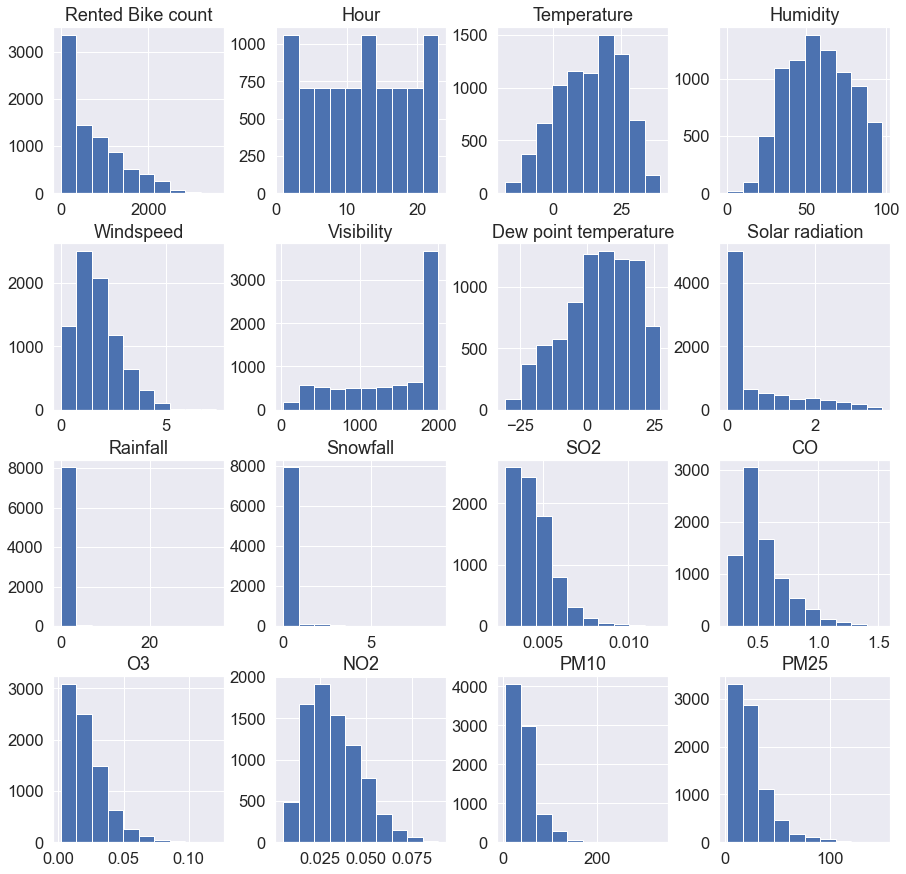

In [43]:
df.hist(figsize=(15,15));

# 성능 비교 및 하이퍼 파라미터 튜닝